In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms

import time
import os
import PIL.Image as Image
from tqdm import tqdm
from IPython.display import display

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name(device))

cuda:0
Tesla T4


In [2]:
dataset_dir = "/kaggle/input/stanford-cars-repackage/stanford_cars_repackage/car_data/car_data/"
EPOCH = 15
BATCH_SIZE = 32

In [3]:
transform = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = torchvision.datasets.ImageFolder(root=dataset_dir+"train", transform = transform)
test_data = torchvision.datasets.ImageFolder(root=dataset_dir+"test", transform = transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size = BATCH_SIZE, shuffle=True, num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = BATCH_SIZE, shuffle=False, num_workers = 2)


In [4]:
def train_model(model, criterion, optimizer, n_epochs = 5):
    
    losses = []
    accuracies = []
    test_accuracies = []
    # set the model to train mode initially
    for epoch in range(n_epochs):
        model.train()
        since = time.time()
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0
        for i, data in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}: '), 0):
            
            # get the inputs and assign them to cuda
            inputs, labels = data
            #inputs = inputs.to(device).half() # uncomment for half precision model
            inputs = inputs.to(device)
            labels = labels.to(device)
            optimizer.zero_grad()
            
            # forward + backward + optimize
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            # calculate the loss/acc later
            running_loss += loss.item()
            running_correct += (labels==predicted).sum().item()

        epoch_duration = time.time()-since
        epoch_loss = running_loss/len(train_loader)
        epoch_acc = 100/BATCH_SIZE*running_correct/len(train_loader)

        
        losses.append(epoch_loss)
        accuracies.append(epoch_acc)
        
        # switch the model to eval mode to evaluate on test data
        model.eval()
        test_acc = eval_model(model)
        test_accuracies.append(test_acc)
        print("Epoch %s, duration: %d s, loss: %.4f, acc: %.4f" % (epoch+1, epoch_duration, epoch_loss, epoch_acc))
        # re-set the model to train mode after validating
        
    print('Finished Training')
    return model, losses, accuracies, test_accuracies


In [10]:
def eval_model(model):
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        for i, data in enumerate(test_loader, 0):
            images, labels = data
            #images = images.to(device).half() # uncomment for half precision model
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images) 
            _, predicted = torch.max(outputs.data, 1)
            
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc = 100.0 * correct / total
    print('Accuracy of the network on the test images: %d %%\n' % (test_acc))
    return test_acc

In [11]:
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features

# replace the last fc layer with an untrained one (requires grad by default)
model.fc = nn.Linear(num_features, 196)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [12]:
model, training_losses, training_accs, test_accs = train_model(model, criterion, optimizer, n_epochs=EPOCH)

Epoch 1: 100%|██████████| 129/129 [00:41<00:00,  3.08it/s]


Accuracy of the network on the test images: 35 %

Epoch 1, duration: 41 s, loss: 3.8759, acc: 16.0126


Epoch 2: 100%|██████████| 129/129 [00:42<00:00,  3.06it/s]


Accuracy of the network on the test images: 66 %

Epoch 2, duration: 42 s, loss: 1.5116, acc: 63.3479


Epoch 3: 100%|██████████| 129/129 [00:41<00:00,  3.08it/s]


Accuracy of the network on the test images: 75 %

Epoch 3, duration: 41 s, loss: 0.5280, acc: 89.4622


Epoch 4: 100%|██████████| 129/129 [00:41<00:00,  3.09it/s]


Accuracy of the network on the test images: 83 %

Epoch 4, duration: 41 s, loss: 0.1731, acc: 97.2384


Epoch 5: 100%|██████████| 129/129 [00:41<00:00,  3.08it/s]


Accuracy of the network on the test images: 86 %

Epoch 5, duration: 41 s, loss: 0.0701, acc: 98.9583


Epoch 6: 100%|██████████| 129/129 [00:42<00:00,  3.06it/s]


Accuracy of the network on the test images: 87 %

Epoch 6, duration: 42 s, loss: 0.0348, acc: 99.2490


Epoch 7: 100%|██████████| 129/129 [00:41<00:00,  3.09it/s]


Accuracy of the network on the test images: 87 %

Epoch 7, duration: 41 s, loss: 0.0242, acc: 99.2006


Epoch 8: 100%|██████████| 129/129 [00:41<00:00,  3.07it/s]


Accuracy of the network on the test images: 87 %

Epoch 8, duration: 41 s, loss: 0.0192, acc: 99.2733


Epoch 9: 100%|██████████| 129/129 [00:42<00:00,  3.07it/s]


Accuracy of the network on the test images: 88 %

Epoch 9, duration: 42 s, loss: 0.0152, acc: 99.2733


Epoch 10: 100%|██████████| 129/129 [00:42<00:00,  3.04it/s]


Accuracy of the network on the test images: 87 %

Epoch 10, duration: 42 s, loss: 0.0147, acc: 99.2490


Epoch 11: 100%|██████████| 129/129 [00:41<00:00,  3.09it/s]


Accuracy of the network on the test images: 87 %

Epoch 11, duration: 41 s, loss: 0.0130, acc: 99.2248


Epoch 12: 100%|██████████| 129/129 [00:41<00:00,  3.08it/s]


Accuracy of the network on the test images: 88 %

Epoch 12, duration: 41 s, loss: 0.0105, acc: 99.2490


Epoch 13: 100%|██████████| 129/129 [00:41<00:00,  3.09it/s]


Accuracy of the network on the test images: 88 %

Epoch 13, duration: 41 s, loss: 0.0108, acc: 99.2248


Epoch 14: 100%|██████████| 129/129 [00:42<00:00,  3.07it/s]


Accuracy of the network on the test images: 88 %

Epoch 14, duration: 42 s, loss: 0.0103, acc: 99.2006


Epoch 15: 100%|██████████| 129/129 [00:43<00:00,  2.98it/s]


Accuracy of the network on the test images: 88 %

Epoch 15, duration: 43 s, loss: 0.0086, acc: 99.2490
Finished Training


Text(0.5, 1.0, 'Test acc')

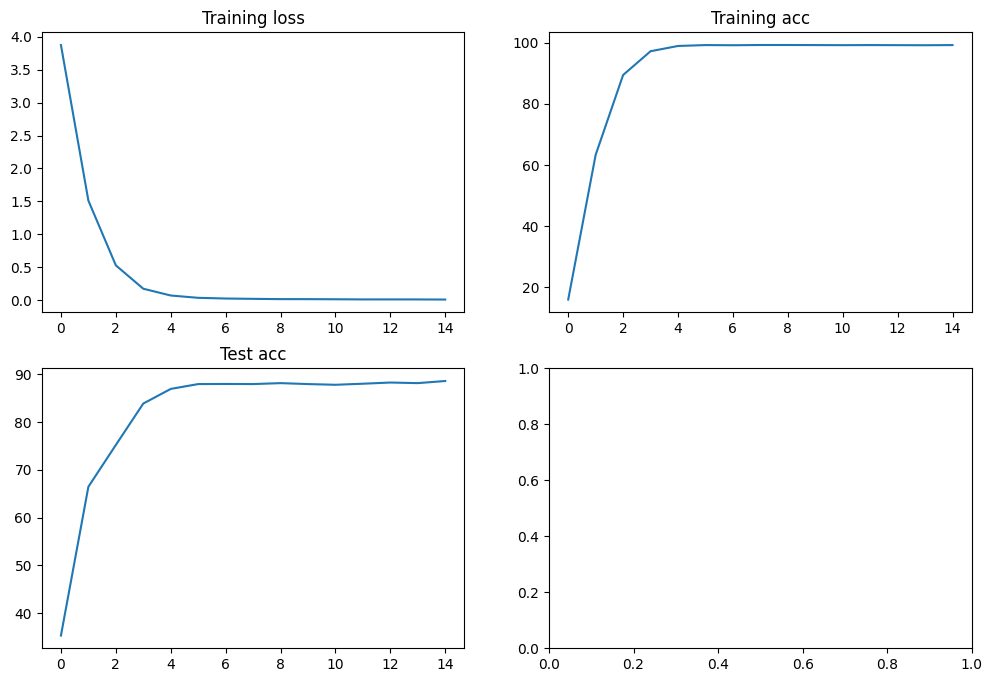

In [13]:
# plot the stats

f, axarr = plt.subplots(2,2, figsize = (12, 8))
axarr[0, 0].plot(training_losses)
axarr[0, 0].set_title("Training loss")
axarr[0, 1].plot(training_accs)
axarr[0, 1].set_title("Training acc")
axarr[1, 0].plot(test_accs)

axarr[1, 0].set_title("Test acc")

In [14]:
# tie the class indices to their names

def find_classes(dir):
    classes = os.listdir(dir)
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx
classes, c_to_idx = find_classes(dataset_dir+"train")

In [15]:
# test the model on random images


# switch the model to evaluation mode to make dropout and batch norm work in eval mode
model.eval()

# transforms for the input image
loader = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
image = Image.open(dataset_dir+"test/Mercedes-Benz C-Class Sedan 2012/01977.jpg")
image = loader(image).float()
image = torch.autograd.Variable(image, requires_grad=True)
image = image.unsqueeze(0)
image = image.cuda()
output = model(image)
conf, predicted = torch.max(output.data, 1)

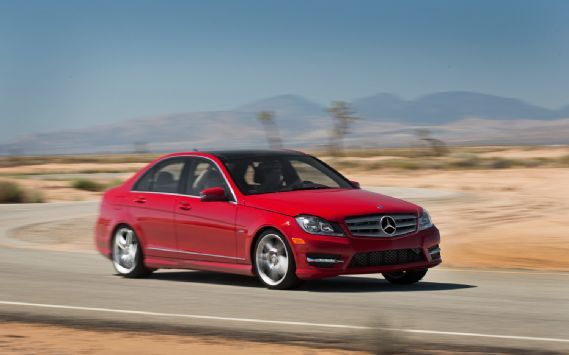

BMW 3 Series Sedan 2012 confidence:  9.810917854309082


In [16]:
# get the class name of the prediction
display(Image.open(dataset_dir+"test/Mercedes-Benz C-Class Sedan 2012/01977.jpg"))
print(classes[predicted.item()], "confidence: ", conf.item())